<a href="https://colab.research.google.com/github/AurelioNaufal/latihan1/blob/main/Latihan_1_KompStat_Kelompok_6_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
# Load modul-modul yang akan dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

# Load Data

In [ ]:
# Load datanya
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Preprocessing

In [ ]:
# Load data from list to datafame for further processing.
news_df = pd.DataFrame({'document':documents})

# Removing everything except alphabets (i.e. the punctuations, numbers, and special characters) 
# and will replace them with blank space
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words because they usually don’t contain useful information
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase to nullify case sensitivity.
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Load stopwords (here I used Spacy for stopwords you can also use NLTK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

# tokenization - break sentences into words
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization - Join words to get back the sentences
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

# Topic Modeling

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()
X1 = [] #variabel topiknya

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    t1 = []
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
        item = (t[0])
        t1.append(item)
    t2 = " ".join(t1)
    X1.append(t2)
    print(" ")
print(X1)

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need right file card files want good  
Topic 19: need time windows want israel window israeli  
['like know people think good time thanks', 'thanks windows card drive mail file advance', 'game team year games season players good', 'drive scsi hard disk card drives problem', 'windows file window files program problem version', 'government space chip mail information data encryption', 'like bike chip sounds know looks look', 'card sale video monitor offer price jesus', 'know card chip video government people clipper', 'good know time bike problem jesus work', 'think good chip clipper need encryption people', 'thanks problem right bike good window time', 'good people windows know sale file files', 'space think know nasa problem year israel', 'space good card thanks people year nasa', 'people problem game window time work want', 'problem good 

In [ ]:
X_topics=svd_model.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2).fit_transform(X_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


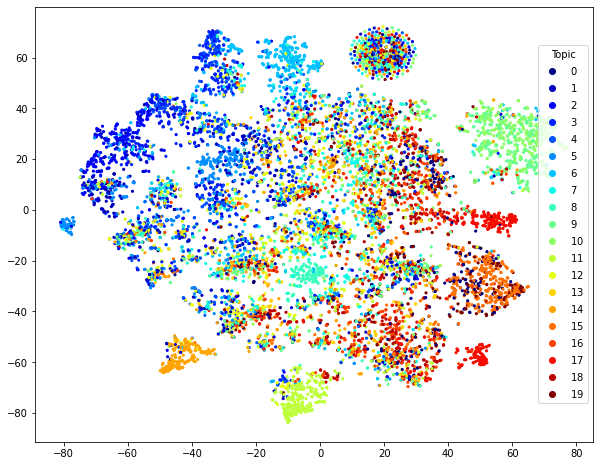

In [ ]:
plt.figure(figsize=(10,8))
scatter=plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none',
cmap='jet'
)
plt.legend(*scatter.legend_elements(num=20),loc=5, title="Topic")
plt.show()

Setiap titik merepresentasikan dokumen, dan warnanya merepresentasikan 20 topiknya. Dapat dilihat dari plot tersebut topiknya tersebar dan membentuk cluster dimana terdapat suatu cluster yang terdiri dari berbagai macam topik yang berkumpul dalam bentuk sirkular.

# Topic Modelling dengan Metode SVD

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(X1)

A.shape

(20, 52)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
print(str(vsm.vocabulary_)[:100])

{'like': 22, 'know': 21, 'people': 30, 'think': 43, 'good': 14, 'time': 44, 'thanks': 42, 'windows':


In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (20, 20) (20,) (52, 52)
[5.65319837 3.75910616 3.49941505 3.00990531 2.96073816 2.8552461
 2.70671488 2.68242524 2.51265407 2.34290866 2.22585026 2.17819899
 2.07001375 1.88422163 1.74875623 1.58081741 1.46666141 1.33579494
 1.12988047 1.02900753]


In [ ]:
x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'like': 22, 'know': 21, 'people': 30, 'think': 43, 'good': 14, 'time': 44, 'thanks': 42, 'windows': 49, 'card': 2, 'drive': 7, 'mail': 25, 'file': 10, 'advance': 0, 'game': 12, 'team': 41, 'year': 51, 'games': 13, 'season': 38, 'players': 31, 'scsi': 37, 'hard': 16, 'disk': 6, 'drives': 8, 'problem': 33, 'window': 48, 'files': 11, 'program': 34, 'version': 45, 'government': 15, 'space': 40, 'chip': 3, 'information': 17, 'data': 5, 'encryption': 9, 'bike': 1, 'sounds': 39, 'looks': 24, 'look': 23, 'sale': 36, 'video': 46, 'monitor': 26, 'offer': 29, 'price': 32, 'jesus': 20, 'clipper': 4, 'work': 50, 'need': 28, 'right': 35, 'nasa': 27, 'israel': 18, 'want': 47, 'israeli': 19}


In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['advance', 'bike', 'card', 'chip', 'clipper', 'data', 'disk', 'drive', 'drives', 'encryption', 'file', 'files', 'game', 'games', 'good', 'government', 'hard', 'information', 'israel', 'israeli']


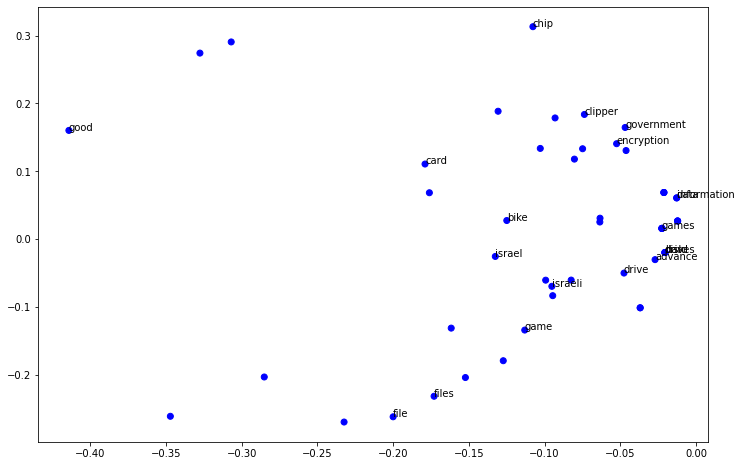

In [ ]:
# Selanjutnya akan diplot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

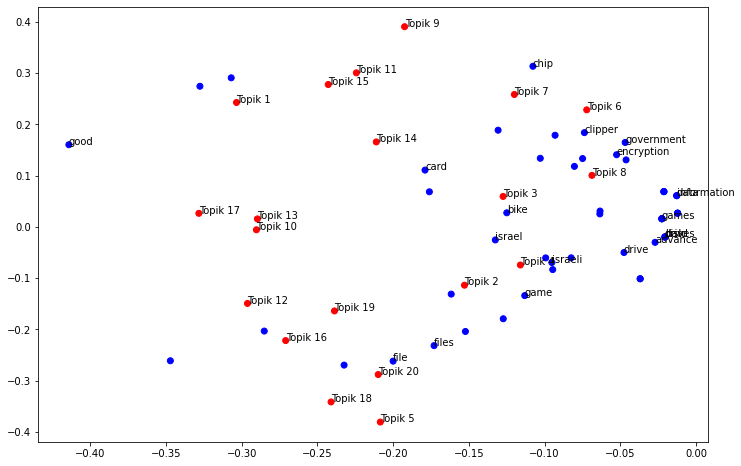

In [ ]:
# Mari kita gabungkan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['Topik 1','Topik 2','Topik 3','Topik 4','Topik 5','Topik 6','Topik 7','Topik 8','Topik 9','Topik 10','Topik 11','Topik 12',
               'Topik 13','Topik 14','Topik 15','Topik 16','Topik 17','Topik 18','Topik 19','Topik 20']
# Saatnya kita plot
# Mulai dari "Words" terlebih dahulu dengan warna biru "b"
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))
    
# Lalu judul (dokumen) dengan warna Merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))

Dapat dilihat dari plot tersebut korelasi antara topik dan kata-kata yang sering muncul.